In [ ]:
!pip install "python-doctr[tf]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.5/299.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 58.0 MB/s eta 0:00:00
   ━━━

In [57]:
from doctr.models import ocr_predictor
from doctr.io import DocumentFile

# Front

In [58]:
image = DocumentFile.from_images("govidfront.jpeg")

In [59]:
predictor = ocr_predictor(pretrained=True)

In [60]:
result = predictor(image)

In [ ]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 52.0 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20727 sha256=534575e60681ec3b66ea2329953bf4180b9a34f2be36ae92c4c2699574e82fe7
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


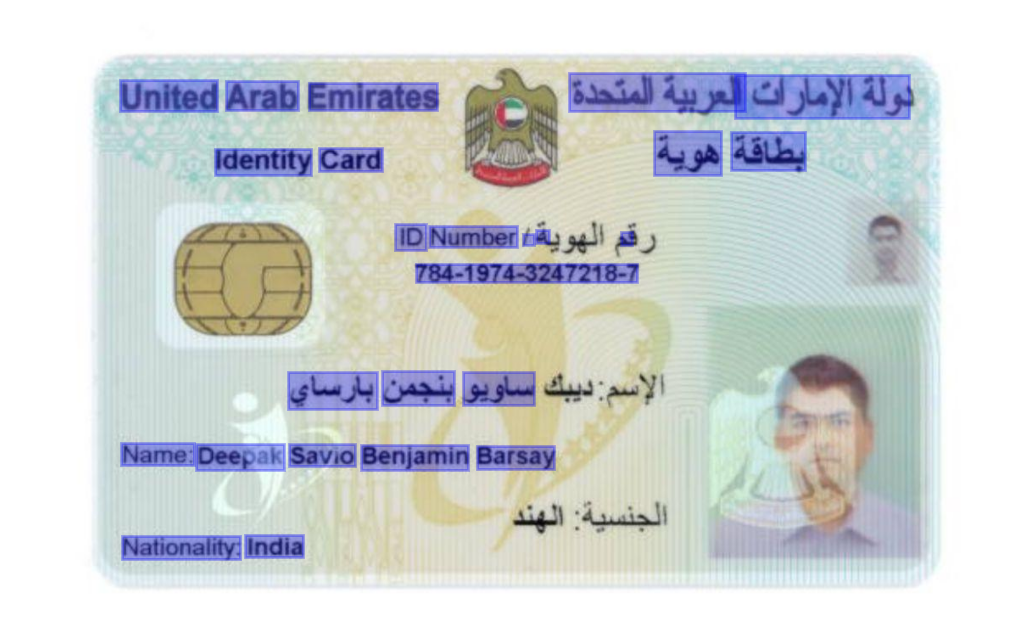

In [61]:
result.show()

In [62]:
output = result.export()

In [63]:
print(output)

{'pages': [{'page_idx': 0, 'dimensions': (728, 1179), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.109375, 0.10144981971153844), (0.8984375, 0.8890608902815934)), 'objectness_score': 0.7922484099864959, 'lines': [{'geometry': ((0.109375, 0.11410220638736263), (0.4267578125, 0.16313020475618134)), 'objectness_score': 0.8509745597839355, 'words': [{'value': 'United', 'confidence': 0.9997749328613281, 'geometry': ((0.109375, 0.11410220638736263), (0.20703125, 0.16313020475618134)), 'objectness_score': 0.8429294228553772, 'crop_orientation': {'value': 0, 'confidence': None}}, {'value': 'Arab', 'confidence': 0.9989534020423889, 'geometry': ((0.2158203125, 0.11568375472184067), (0.287109375, 0.1615486564217033)), 'objectness_score': 0.8514330387115479, 'crop_orientation': {'value': 0, 'confidence': None}}, {'value': 'Emirates', 'confidence': 0.9916068911552429, 'geometry': ((0.298828125, 0.1188468513907967), 

In [64]:
for words in output["pages"][0]["blocks"][0]["lines"][0]["words"]:
    print(words["value"])

United
Arab
Emirates


In [65]:
# Get only the text, line by line
extracted_lines = []
for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            line_text = ' '.join([word.value for word in line.words])
            extracted_lines.append(line_text)

# Join the list of lines into a single string, with each line on a new line
full_text = '\n'.join(extracted_lines)

print(full_text)


United Arab Emirates
Slaidluuyal ej4y1d,
Identity Card
4ga 48lh
ID Number I 4
-
784-1974-3247218-7
sl4 cai sglw
Name: Deepak Savio Benjamin Barsay
Nationality: India


In [66]:
import re

id_number_match = re.search(r'(\d{3}-\d{4}-\d{7}-\d{1})', full_text)
# Updated Name regex to stop before the keyword "Nationality"
name_match = re.search(r'Name:\s*([A-Za-z\s]+)(?=\nNationality)', full_text)
# Nationality regex: only captures when the actual nationality is provided
nationality_match = re.search(r'Nationality\s*[:\n]+\s*([A-Za-z]+)', full_text)

# Extracting the values
id_number = id_number_match.group(1) if id_number_match else None
name = name_match.group(1).strip() if name_match else None
nationality = nationality_match.group(1).strip() if nationality_match else None

# Printing the extracted values
print(f'ID Number: {id_number}')
print(f'Name: {name}')
print(f'Nationality: {nationality}')

ID Number: 784-1974-3247218-7
Name: Deepak Savio Benjamin Barsay
Nationality: India


# Back

In [67]:
back_image = DocumentFile.from_images("govidback.jpeg")

In [68]:
result1 = predictor(back_image)

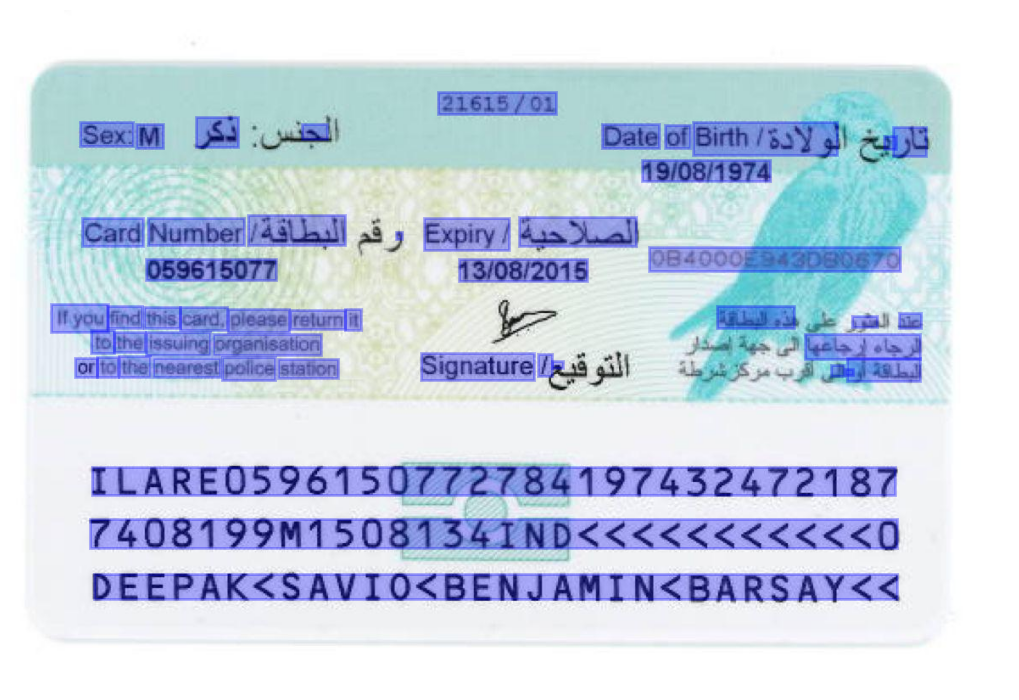

In [69]:
result1.show()

In [70]:
extracted_lines = []
for page in result1.pages:
    for block in page.blocks:
        for line in block.lines:
            line_text = ' '.join([word.value for word in line.words])
            extracted_lines.append(line_text)

# Join the list of lines into a single string, with each line on a new line
back_text = '\n'.join(extracted_lines)

print(back_text)

21615/01
Sex: M S
2
Date of Birth/sy
- j
19/08/1974
Card Number Asuil
1 Expiry/ 4asuall
059615077
13/08/2015
08400009430890870
Ifyou find this card, please return it
L.
- ilc
to the issuing organisation
yeladela
or to the nearest police station
Signature I -
 - RLLJ
ILARE0596150772784197432472187
7408199M15081341ND<<<<<<<<<<<0
DEEPAK<SAVIOKBENJAMINKBARSAY<<


In [71]:
# Regular expression to extract Sex, DOB, Card Number, and Expiry
sex_match = re.search(r'Sex[:\s]+([MF])', back_text)
dob_match = re.search(r'Date of Birth.*?(\d{2}/\d{2}/\d{4})', back_text, re.DOTALL)
card_number_match = re.search(r'Card Number.*?(\d{9})', back_text, re.DOTALL)
expiry_match = re.search(r'Expiry.*?(\d{2}/\d{2}/\d{4})', back_text, re.DOTALL)

# Extract the values
sex = sex_match.group(1) if sex_match else None
dob = dob_match.group(1) if dob_match else None
card_number = card_number_match.group(1) if card_number_match else None
expiry = expiry_match.group(1) if expiry_match else None

# Ensure DOB and Expiry are not the same
if dob == expiry:
    # Search for another expiry date specifically after the Card Number keyword
    expiry_search = re.search(r'(\d{2}/\d{2}/\d{4})', back_text.split('Card Number')[-1], re.DOTALL)
    if expiry_search:
        expiry = expiry_search.group(1)

# Print the extracted values
print(f'Sex: {sex}')
print(f'DOB: {dob}')
print(f'Card Number: {card_number}')
print(f'Expiry: {expiry}')


Sex: M
DOB: 19/08/1974
Card Number: 059615077
Expiry: 13/08/2015


# Final Results

In [56]:
print(f'ID Number: {id_number}')
print(f'Name: {name}')
print(f'Nationality: {nationality}')
print(f'Sex: {sex}')
print(f'DOB: {dob}')
print(f'Card Number: {card_number}')
print(f'Expiry: {expiry}')


ID Number: 784-1974-3247218-7
Name: Deepak Savio Benjamin Barsay
Nationality: India
Sex: M
DOB: 19/08/1974
Card Number: 059615077
Expiry: 13/08/2015


# KIE Predictor

In [ ]:
from doctr.models import kie_predictor

In [ ]:
model = kie_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

In [ ]:
result2 = model(back_image)

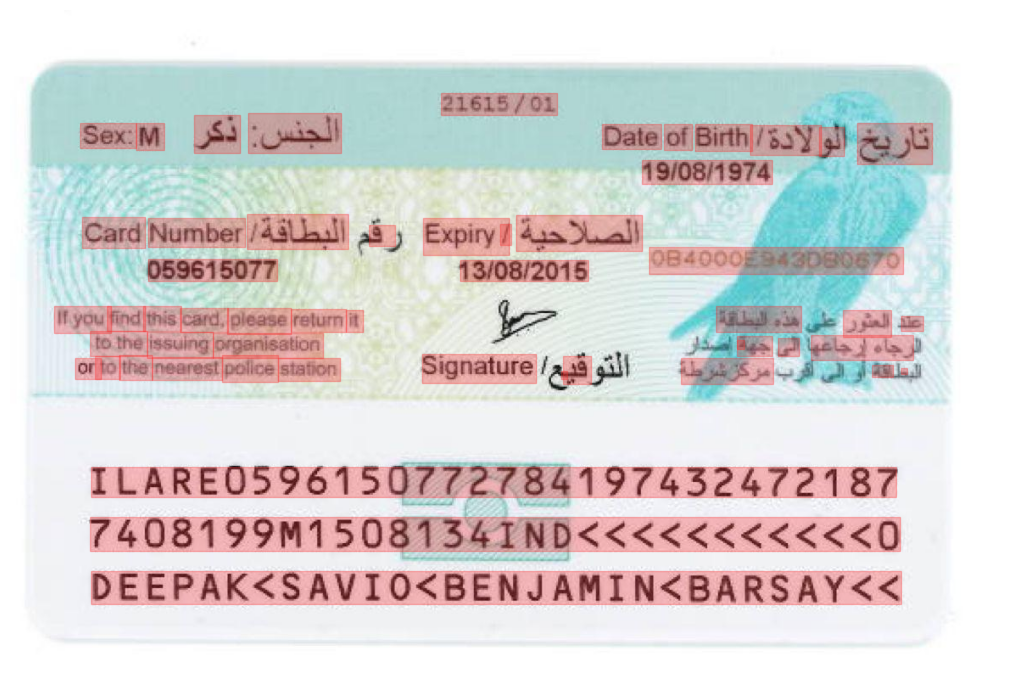

In [ ]:
result2.show()

In [ ]:
predictions = result2.pages[0].predictions
for class_name in predictions.keys():
    list_predictions = predictions[class_name]
    for prediction in list_predictions:
        print(f"Prediction for {class_name}: {prediction}")


Prediction for words: Prediction(value='21615/01', confidence=0.99, bounding_box=((0.4306640625, 0.12243195721633415), (0.546875, 0.15401559577618457)))
Prediction for words: Prediction(value='Sex:', confidence=0.99, bounding_box=((0.0693359375, 0.16550055525249374), (0.1259765625, 0.20282667355049877)))
Prediction for words: Prediction(value='M', confidence=1.0, bounding_box=((0.1259765625, 0.16550055525249374), (0.1533203125, 0.20569791341957605)))
Prediction for words: Prediction(value='S', confidence=0.31, bounding_box=((0.18359375, 0.15401559577618457), (0.2294921875, 0.210004773223192)))
Prediction for words: Prediction(value='cuiall', confidence=0.056, bounding_box=((0.2373046875, 0.15114435590710723), (0.3310546875, 0.210004773223192)))
Prediction for words: Prediction(value='Date', confidence=1.0, bounding_box=((0.591796875, 0.1669361751870324), (0.650390625, 0.20426229348503738)))
Prediction for words: Prediction(value='of', confidence=1.0, bounding_box=((0.6533203125, 0.1669